<a href="https://colab.research.google.com/github/SirNiksALot/Neural_networks_from_scratch/blob/main/Neural_Network_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Dataset=pd.read_csv("train.csv")
data=np.array(Dataset)
m,n=data.shape
np.random.shuffle(data)
print(m)
print(n)

test=data[0:1000].T
y_test=test[0]
x_test=test[1:n]
x_test=x_test/255.

train=data[1000:m].T
y_train=train[0]
x_train=train[1:n]
x_train=x_train/255.

print(y_test.shape)
print(x_test.shape)
print(y_train.shape)
print(x_train.shape)


42000
785
(1000,)
(784, 1000)
(41000,)
(784, 41000)


In [ ]:
def initialize_parameters():
  w1=np.random.rand(10,784)-0.5
  b1=np.random.rand(10,1)-0.5
  w2=np.random.rand(10,10)-0.5
  b2=np.random.rand(10,1)-0.5
  w3=np.random.rand(10,10)-0.5
  b3=np.random.rand(10,1)-0.5
  w4=np.random.rand(10,10)-0.5
  b4=np.random.rand(10,1)-0.5

  return w1, b1, w2, b2, w3, b3, w4, b4

def ReLU(Z):
  return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop( X, w1, b1, w2, b2, w3, b3, w4, b4):
  Z1=w1.dot(X) + b1
  A1=ReLU(Z1)
  Z2=w2.dot(A1) + b2
  A2=ReLU(Z2)
  Z3=w3.dot(A2) + b3
  A3=ReLU(Z3)
  Z4=w4.dot(A3) + b4
  A4=softmax(Z4)
  return Z1, A1, Z2, A2, Z3, A3, Z4, A4

def derivative_reLU(Z):
  return Z > 0

def one_hot(Y):
   one_hot_Y = np.zeros((Y.size, Y.max() + 1))
   one_hot_Y[np.arange(Y.size), Y] = 1
   one_hot_Y = one_hot_Y.T
   return one_hot_Y

def back_propogation(X, Y, w1, b1, w2, b2, w3, b3, w4, b4, Z1, A1, Z2, A2, Z3, A3, Z4, A4):

  Y_encoded=one_hot(Y) #we one hot encode the labels of these digits into Y_encode
  dZ4 = A4 - Y_encoded
  c_w4 = 1/m * dZ4.dot(A3.T) 
  c_b4 = 1/m * np.sum(dZ4)  #adds up all the elements and squishes them into a vector for gradient descent and then updation of bias

  dZ3 = (w4.T).dot(dZ4) * derivative_reLU(Z3)
  c_w3 = 1/m * dZ3.dot(A2.T) 
  c_b3 = 1/m * np.sum(dZ3) 

  dZ2 = (w3.T).dot(dZ3) * derivative_reLU(Z2)
  c_w2 = 1/m * dZ2.dot(A1.T) 
  c_b2 = 1/m * np.sum(dZ2) 

  dZ1 = (w2.T).dot(dZ2) * derivative_reLU(Z1)
  c_w1 = 1/m * dZ1.dot(X.T) 
  c_b1 = 1/m * np.sum(dZ1) 

  return c_w1, c_b1, c_w2, c_b2, c_w3, c_b3, c_w4, c_b4
  
def update_parameters(c_w1, c_b1, c_w2, c_b2, c_w3, c_b3, c_w4, c_b4, w1, b1, w2, b2, w3, b3, w4, b4, a):
  w1 =w1 - a * c_w1
  b1 =b1 - a * c_b1
  w2 =w2 - a * c_w2
  b2 =b2 - a * c_b2
  w3 =w3 - a * c_w3
  b3 =b3 - a * c_b3
  w4 =w4 - a * c_w4
  b4 =b4 - a * c_b4
  
  return w1, b1, w2, b2, w3, b3, w4, b4

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def train_model( X, Y, n, a):
  w1, b1, w2, b2, w3, b3, w4, b4 = initialize_parameters()
  for i in range(0,n):
    Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_prop( X, w1, b1, w2, b2, w3, b3, w4, b4)
    c_w1, c_b1, c_w2, c_b2, c_w3, c_b3, c_w4, c_b4 = back_propogation( X, Y, w1, b1, w2, b2, w3, b3, w4, b4, Z1, A1, Z2, A2, Z3, A3, Z4, A4)
    w1, b1, w2, b2, w3, b3, w4, b4 = update_parameters(c_w1, c_b1, c_w2, c_b2, c_w3, c_b3, c_w4, c_b4, w1, b1, w2, b2, w3, b3, w4, b4, a)
    if i%10==0:
      print("iteration:",i)      
      predictions=get_predictions(A4)       
      print(get_accuracy(predictions,Y))        
  return  w1, b1, w2, b2, w3, b3, w4, b4

In [ ]:
W1, B1, W2, B2, W3, B3, W4, B4 = train_model( x_train, y_train , 500 , 0.45)

iteration: 0
[3 3 3 ... 4 3 3] [9 3 0 ... 6 6 4]
0.117
iteration: 10
[8 8 7 ... 0 8 3] [9 3 0 ... 6 6 4]
0.21314634146341463
iteration: 20
[0 0 0 ... 0 1 4] [9 3 0 ... 6 6 4]
0.2251219512195122
iteration: 30
[8 8 7 ... 0 1 4] [9 3 0 ... 6 6 4]
0.24504878048780487
iteration: 40
[4 8 0 ... 0 1 4] [9 3 0 ... 6 6 4]
0.36741463414634146
iteration: 50
[4 4 0 ... 0 3 4] [9 3 0 ... 6 6 4]
0.2719756097560976
iteration: 60
[9 8 0 ... 0 1 4] [9 3 0 ... 6 6 4]
0.503609756097561
iteration: 70
[7 3 0 ... 0 6 7] [9 3 0 ... 6 6 4]
0.47609756097560973
iteration: 80
[9 8 0 ... 0 3 4] [9 3 0 ... 6 6 4]
0.644390243902439
iteration: 90
[4 8 0 ... 0 3 4] [9 3 0 ... 6 6 4]
0.6873658536585366
iteration: 100
[9 8 0 ... 0 3 4] [9 3 0 ... 6 6 4]
0.6942439024390243
iteration: 110
[9 8 0 ... 5 3 9] [9 3 0 ... 6 6 4]
0.6866341463414635
iteration: 120
[9 3 0 ... 5 3 9] [9 3 0 ... 6 6 4]
0.6968780487804878
iteration: 130
[9 3 0 ... 0 6 9] [9 3 0 ... 6 6 4]
0.7028780487804878
iteration: 140
[9 3 0 ... 0 6 9] [9 3 0 ..

In [ ]:
def make_predictions( X, w1, b1, w2, b2, w3, b3, w4, b4):
    _, _, _, _, _, _, _, A4 =forward_prop( X, w1, b1, w2, b2, w3, b3, w4, b4)
    predictions = get_predictions(A4)
    return predictions

def test_prediction(index,  w1, b1, w2, b2, w3, b3, w4, b4):
    current_image = x_test[:, index, None]
    prediction = make_predictions(x_test[:, index, None],  w1, b1, w2, b2, w3, b3, w4, b4 )
    label = y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


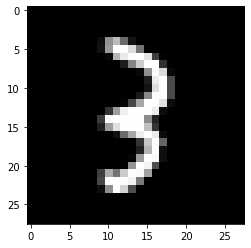

Prediction:  [3]
Label:  3


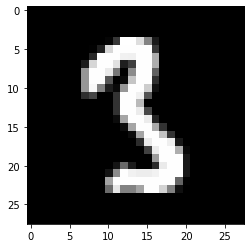

Prediction:  [9]
Label:  9


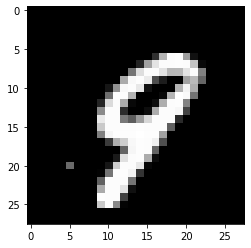

Prediction:  [1]
Label:  1


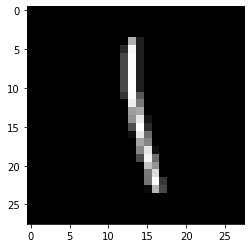

Prediction:  [4]
Label:  4


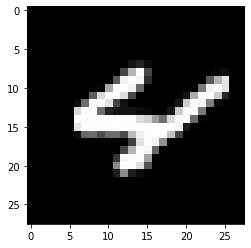

Prediction:  [9]
Label:  9


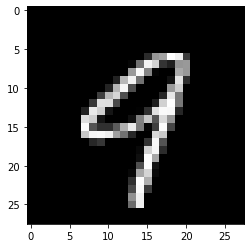

Prediction:  [3]
Label:  2


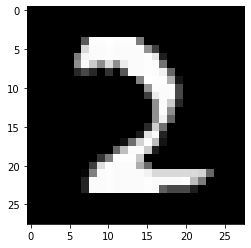

Prediction:  [8]
Label:  0


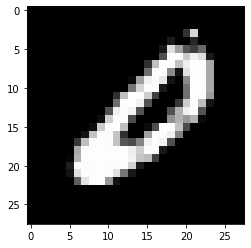

In [ ]:
test_prediction(0, W1, B1, W2, B2, W3, B3, W4, B4)
test_prediction(1, W1, B1, W2, B2, W3, B3, W4, B4)
test_prediction(2, W1, B1, W2, B2, W3, B3, W4, B4)
test_prediction(3, W1, B1, W2, B2, W3, B3, W4, B4)
test_prediction(4, W1, B1, W2, B2, W3, B3, W4, B4)
test_prediction(5, W1, B1, W2, B2, W3, B3, W4, B4)
test_prediction(6, W1, B1, W2, B2, W3, B3, W4, B4)
test_prediction(7, W1, B1, W2, B2, W3, B3, W4, B4)